In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt1
from matplotlib import style
from statistics import mean

In [2]:
df = pd.read_csv('neighbourhood-profiles-2016-csv.csv',sep=',')
df.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [3]:
df1 = df[ ((df["Category"] == "Housing")|(df["Category"] == "Immigration and citizenship")) & ((df["Topic"] == "Core housing need")|(df["Topic"] == "Immigrant status and period of immigration"))
         &  ( (df["Characteristic"] == "Core housing need, Unsuitable only") | (df["Characteristic"] == "Core housing need, Unaffordable only")
             | (df["Characteristic"] == "Core housing need, Inadequate only") |(df["Characteristic"] == "Core housing need, two or more dimensions")| (df["Characteristic"] == "Occupied private dwellings")|(df["Characteristic"] == "  Non-immigrants")|(df["Characteristic"] == "  Immigrants"))]
df1.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
1151,1152,Immigration and citizenship,Immigrant status and period of immigration,Census Profile 98-316-X2016001,Non-immigrants,"1,332,090","7,895","7,190","7,975","19,030",...,"5,970","11,775","20,645","9,320","5,490","8,525","8,080","8,325","10,295","6,380"
1152,1153,Immigration and citizenship,Immigrant status and period of immigration,Census Profile 98-316-X2016001,Immigrants,"1,266,005","19,995","15,095","3,970","8,270",...,"9,390","10,030","30,185","2,935","2,190","4,345","3,180","3,580","15,595","7,265"
1680,1681,Housing,Core housing need,Catalogue no. 98-509-X2016001,Occupied private dwellings,"1,112,930","9,115","8,135","4,615","15,930",...,"7,560","8,510","18,445","5,450","3,450","5,890","5,680","7,015","10,175","5,340"
1684,1685,Housing,Core housing need,Catalogue no. 98-509-X2016001,"Core housing need, Unsuitable only","18,680",150,120,40,45,...,35,180,665,50,0,60,15,0,345,85
1685,1686,Housing,Core housing need,Catalogue no. 98-509-X2016001,"Core housing need, Inadequate only","8,275",30,55,10,135,...,30,80,275,85,35,35,15,10,85,35


In [4]:
df1 =df1.loc[:,'City of Toronto':]
df1

,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
1151,"1,332,090","7,895","7,190","7,975","19,030","13,310","7,135","9,995","7,220","4,735",...,"5,970","11,775","20,645","9,320","5,490","8,525","8,080","8,325","10,295","6,380"
1152,"1,266,005","19,995","15,095","3,970","8,270","13,195","8,020","10,455","12,625","7,535",...,"9,390","10,030","30,185","2,935","2,190","4,345","3,180","3,580","15,595","7,265"
1680,"1,112,930","9,115","8,135","4,615","15,930","12,125","6,085","15,075","9,530","4,695",...,"7,560","8,510","18,445","5,450","3,450","5,890","5,680","7,015","10,175","5,340"
1684,"18,680",150,120,40,45,85,90,65,30,45,...,35,180,665,50,0,60,15,0,345,85
1685,"8,275",30,55,10,135,10,45,30,30,35,...,30,80,275,85,35,35,15,10,85,35
1686,"160,795","1,650","1,350",405,"1,855","1,730",975,"1,250","1,200",655,...,"1,085","1,170","3,060",715,520,980,665,820,"1,705",705
1687,"53,030",390,260,75,375,290,255,425,425,140,...,235,345,"1,310",155,145,210,135,215,765,220


In [5]:
df2 = df1.T
df2

,1151,1152,1680,1684,1685,1686,1687
City of Toronto,"1,332,090","1,266,005","1,112,930","18,680","8,275","160,795","53,030"
Agincourt North,"7,895","19,995","9,115",150,30,"1,650",390
Agincourt South-Malvern West,"7,190","15,095","8,135",120,55,"1,350",260
Alderwood,"7,975","3,970","4,615",40,10,405,75
Annex,"19,030","8,270","15,930",45,135,"1,855",375
...,...,...,...,...,...,...,...
Wychwood,"8,525","4,345","5,890",60,35,980,210
Yonge-Eglinton,"8,080","3,180","5,680",15,15,665,135
Yonge-St.Clair,"8,325","3,580","7,015",0,10,820,215
York University Heights,"10,295","15,595","10,175",345,85,"1,705",765


In [6]:
df2 = df2.rename(columns={1151:'Non-immigrants',1152:'Immigrants',1680: 'Occupied Private Dwellings', 1684: 'Unsuitable only', 1685:'Inadequate only',1686:'Unaffordable only',1687:'two or more dimensions'})
df2

,Non-immigrants,Immigrants,Occupied Private Dwellings,Unsuitable only,Inadequate only,Unaffordable only,two or more dimensions
City of Toronto,"1,332,090","1,266,005","1,112,930","18,680","8,275","160,795","53,030"
Agincourt North,"7,895","19,995","9,115",150,30,"1,650",390
Agincourt South-Malvern West,"7,190","15,095","8,135",120,55,"1,350",260
Alderwood,"7,975","3,970","4,615",40,10,405,75
Annex,"19,030","8,270","15,930",45,135,"1,855",375
...,...,...,...,...,...,...,...
Wychwood,"8,525","4,345","5,890",60,35,980,210
Yonge-Eglinton,"8,080","3,180","5,680",15,15,665,135
Yonge-St.Clair,"8,325","3,580","7,015",0,10,820,215
York University Heights,"10,295","15,595","10,175",345,85,"1,705",765


In [7]:
df2['Unsuitable only'] = df2['Unsuitable only'].astype(str).str.replace(',','')  
df2["Unsuitable only"] = pd.to_numeric(df2["Unsuitable only"]) 
df2['Inadequate only'] = df2['Inadequate only'].astype(str).str.replace(',','')   
df2["Inadequate only"] = pd.to_numeric(df2["Inadequate only"]) 
df2['Unaffordable only'] = df2['Unaffordable only'].astype(str).str.replace(',','')   
df2["Unaffordable only"] = pd.to_numeric(df2["Unaffordable only"])
df2['two or more dimensions'] = df2['two or more dimensions'].astype(str).str.replace(',','')
df2["two or more dimensions"] = pd.to_numeric(df2["two or more dimensions"]) 
df2['Occupied Private Dwellings'] = df2['Occupied Private Dwellings'].astype(str).str.replace(',','') 
df2["Occupied Private Dwellings"] = pd.to_numeric(df2["Occupied Private Dwellings"])
df2['Non-immigrants'] = df2['Non-immigrants'].astype(str).str.replace(',','') 
df2["Non-immigrants"] = pd.to_numeric(df2["Non-immigrants"])
df2['Immigrants'] = df2['Immigrants'].astype(str).str.replace(',','') 
df2["Immigrants"] = pd.to_numeric(df2["Immigrants"])
df2["Total Population"]=df2['Immigrants']+df2['Non-immigrants']
df2["Percent Immigrants"]=(df2['Immigrants']/df2['Total Population'])*100
df2["Percent Non-immigrants"]=(df2['Non-immigrants']/df2['Total Population'])*100
df2["Total Unacceptable"] = df2['Unsuitable only']+df2['Inadequate only']+df2['Unaffordable only']+df2['two or more dimensions']
df2["Percent Unacceptable"] =(df2['Total Unacceptable']/df2['Occupied Private Dwellings'])*100
df2

,Non-immigrants,Immigrants,Occupied Private Dwellings,Unsuitable only,Inadequate only,Unaffordable only,two or more dimensions,Total Population,Percent Immigrants,Percent Non-immigrants,Total Unacceptable,Percent Unacceptable
City of Toronto,1332090,1266005,1112930,18680,8275,160795,53030,2598095,48.728203,51.271797,240780,21.634784
Agincourt North,7895,19995,9115,150,30,1650,390,27890,71.692363,28.307637,2220,24.355458
Agincourt South-Malvern West,7190,15095,8135,120,55,1350,260,22285,67.736145,32.263855,1785,21.942225
Alderwood,7975,3970,4615,40,10,405,75,11945,33.235663,66.764337,530,11.484290
Annex,19030,8270,15930,45,135,1855,375,27300,30.293040,69.706960,2410,15.128688
...,...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,8525,4345,5890,60,35,980,210,12870,33.760684,66.239316,1285,21.816638
Yonge-Eglinton,8080,3180,5680,15,15,665,135,11260,28.241563,71.758437,830,14.612676
Yonge-St.Clair,8325,3580,7015,0,10,820,215,11905,30.071399,69.928601,1045,14.896650
York University Heights,10295,15595,10175,345,85,1705,765,25890,60.235612,39.764388,2900,28.501229


In [8]:
TotalHousing = df2['Occupied Private Dwellings'].sum()
TotalInadequate = df2['Inadequate only'].sum()
TotalUnsuitable = df2['Unsuitable only'].sum()
TotalUnafforable = df2['Unaffordable only'].sum()
TotalUnacceptable = df2['Total Unacceptable'].sum()
print(TotalHousing,TotalInadequate,TotalUnsuitable,TotalUnafforable,TotalUnacceptable)

2225815 16505 37355 321605 481495


In [9]:
PercentUnacceptable = (TotalUnacceptable/TotalHousing)*100
PercentInadequate = (TotalInadequate/TotalHousing)*100
PercentUnsuitable = (TotalUnsuitable/TotalHousing)*100
PercentUnaffordable = (TotalUnafforable/TotalHousing)*100
print(PercentUnacceptable,PercentInadequate,PercentUnsuitable,PercentUnaffordable)

21.6323009773948 0.7415261376170077 1.6782616704443092 14.448864797838096


In [10]:
df3 = df2[['Percent Immigrants','Percent Unacceptable']]


In [12]:
df3 = df3.sort_values(by ='Percent Unacceptable')
df3

,Percent Immigrants,Percent Unacceptable
Bridle Path-Sunnybrook-York Mills,34.883721,3.852080
Kingsway South,21.597796,4.184100
Centennial Scarborough,37.532907,7.314286
Princess-Rosethorn,30.755149,8.538163
Lawrence Park South,21.385340,8.869565
...,...,...
Scarborough Village,56.041211,38.617201
Taylor-Massey,58.976965,39.043825
Flemingdon Park,66.745956,39.450128
Oakridge,57.056146,42.140152


Text(0, 0.5, 'Percent Unacceptable')

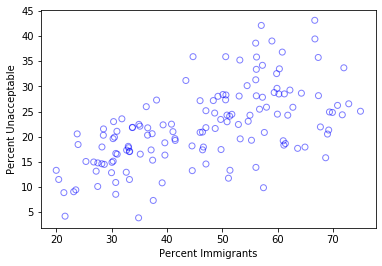

In [27]:
plt1.scatter(df3['Percent Immigrants'], df3['Percent Unacceptable'],
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=0.5 )
plt1.xlabel('Percent Immigrants')
plt1.ylabel('Percent Unacceptable')

In [55]:
df3['Eins'] = np.ones((len(df3), ))
Y = df3[['Percent Unacceptable']]
X = df3[['Percent Immigrants','Eins']]
df3

C:\Users\mamoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Percent Immigrants,Percent Unacceptable,Eins
City of Toronto,48.728203,21.634784,1.0
Agincourt North,71.692363,24.355458,1.0
Agincourt South-Malvern West,67.736145,21.942225,1.0
Alderwood,33.235663,11.484290,1.0
Annex,30.293040,15.128688,1.0
...,...,...,...
Wychwood,33.760684,21.816638,1.0
Yonge-Eglinton,28.241563,14.612676,1.0
Yonge-St.Clair,30.071399,14.896650,1.0
York University Heights,60.235612,28.501229,1.0


In [56]:
import statsmodels.api as sm
df3_outlier=sm.OLS( Y, X ).fit()
df3_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Percent Unacceptable   R-squared:                       0.360
Model:                              OLS   Adj. R-squared:                  0.356
Method:                   Least Squares   F-statistic:                     78.33
Date:                  Sun, 02 Aug 2020   Prob (F-statistic):           3.60e-15
Time:                          14:48:29   Log-Likelihood:                -457.99
No. Observations:                   141   AIC:                             920.0
Df Residuals:                       139   BIC:                             925.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Percent Immigrants     0.3280      0.037      8.850      0.000       0.255       0.401
Eins                   6.6915      1.801      3.715      0.000       3.130      10.253
==============================================================================
Omnibus:                        0.461   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.307
Skew:                           0.113   Prob(JB):                        0.858
Kurtosis:                       3.034   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
df3_outlier.params

Percent Immigrants    0.327967
Eins                  6.691460
dtype: float64

In [70]:
slope, intercept = df3_outlier.params

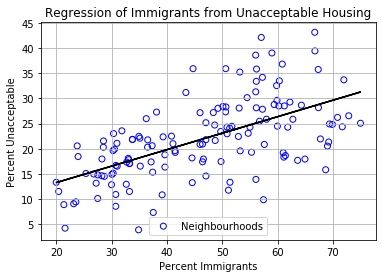

In [71]:
plt1.scatter( df3['Percent Immigrants'], df3['Percent Unacceptable'],
         marker='o', facecolors='none', edgecolors='b',
         label='Neighbourhoods')
 
plt1.plot( df3['Percent Immigrants'], intercept + slope*df3['Percent Immigrants'], 'k' )
plt1.xlabel('Percent Immigrants') ; 
plt1.ylabel('Percent Unacceptable')
plt1.title('Regression of Immigrants from Unacceptable Housing') ;
plt1.grid();
plt1.legend(loc='lower center')
plt1.show()